In [1]:
### Plot equi optimal estimator for paper using Planck style guides
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Configure Matplotlib options
from setup_matplotlib import *
from matplotlib.ticker import MaxNLocator

In [3]:
# Read in data

# import giorgio results
L_analytic_giorgio, N2_6pt_giorgio = np.loadtxt("../../Plots/data/data_for_paper/numerical_N2/Giorgio_equi_N2_analytic.txt")

# Import own low L numerical approximation for RDN2
L__equi_lowL_approx, N2_equi_low_L_phi = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Low_L_equi.txt")
# Convert low L approx to kappa from phi
N2_equi_low_L_kappa = 1/8 * (L__equi_lowL_approx*(L__equi_lowL_approx+1))**3 * N2_equi_low_L_phi


L_var_new_equi, var_new_equi = np.loadtxt("../../Errors/newequi_var.txt")
equi_stddev_theory_new = np.sqrt(var_new_equi)

L_var_new_fold, var_new_fold = np.loadtxt("../../Errors/newfold_var.txt")
fold_stddev_theory_new = np.sqrt(var_new_fold)
# Empirical error
totdatas = 100

cmplx_bispec = {}
error = {}
# Load in different evaluations of the optimal estimator and plot
for i in range(totdatas):
    try:
        L, cmplx_bispec[i], error[i] = np.loadtxt(f"../data/data_for_paper/equi_opt_est/cmplx_bispec_data{i}.txt", unpack = True)
    except OSError:
        print(f'pass equi {i}' )
        pass

# Store all the different estimates of cmplx_bispec in a matrix
data_matrix = np.array([cmplx_bispec[i] for i in cmplx_bispec.keys()])
ndatas = len(cmplx_bispec)

# Calculate average, std_dev, err_in_mean, cov_matrix
cov_matrix = np.cov(data_matrix, rowvar=False)  # rowvar=False to treat columns as variables. np.array stores cmplx_bispec as rows. We want covariance across l bands so treat columns as our variables (each column is an l band).
correlation_matrix = np.corrcoef(data_matrix, rowvar=False)
average_equi = np.mean(data_matrix, axis=0)
sigma_cmplx_bsp = np.std(data_matrix, axis=0)
err_in_mean = sigma_cmplx_bsp / np.sqrt(ndatas)

fold_cmplx_bispec = {}
fold_error = {}
# Load in different evaluations of the optimal estimator and plot
for i in range(totdatas):
    try:
        L, fold_cmplx_bispec[i], fold_error[i] = np.loadtxt(f"../data/data_for_paper/fold_opt_est//fold_cmplx_bispec_data{i}.txt", unpack = True)
    except OSError:
        print(f'pass {i}' )
        pass

# Store all the different estimates of cmplx_bispec in a matrix
fold_data_matrix = np.array([fold_cmplx_bispec[i] for i in fold_cmplx_bispec.keys()])
fold_ndatas = len(fold_cmplx_bispec)

#Calculate average, std_dev, err_in_mean, cov_matrix
fold_cov_matrix = np.cov(fold_data_matrix, rowvar=False)  # rowvar=False to treat columns as variables. np.array stores cmplx_bispec as rows. We want covariance across l bands so treat columns as our variables (each column is an l band).
fold_correlation_matrix = np.corrcoef(fold_data_matrix, rowvar=False)
average_fold = np.mean(fold_data_matrix, axis=0)
fold_sigma_cmplx_bsp = np.std(fold_data_matrix, axis=0)
fold_err_in_mean = fold_sigma_cmplx_bsp / np.sqrt(fold_ndatas)

# Save fold simulation results for seperate comparison with N2 series expansion estimate
np.savetxt('../../N2_numerical/folded_opt_est.txt', (L, average_fold))

print(L_var_new_equi)



[ 30.  50.  70.  90. 150. 250. 350. 450. 550. 650. 750. 850. 950.]


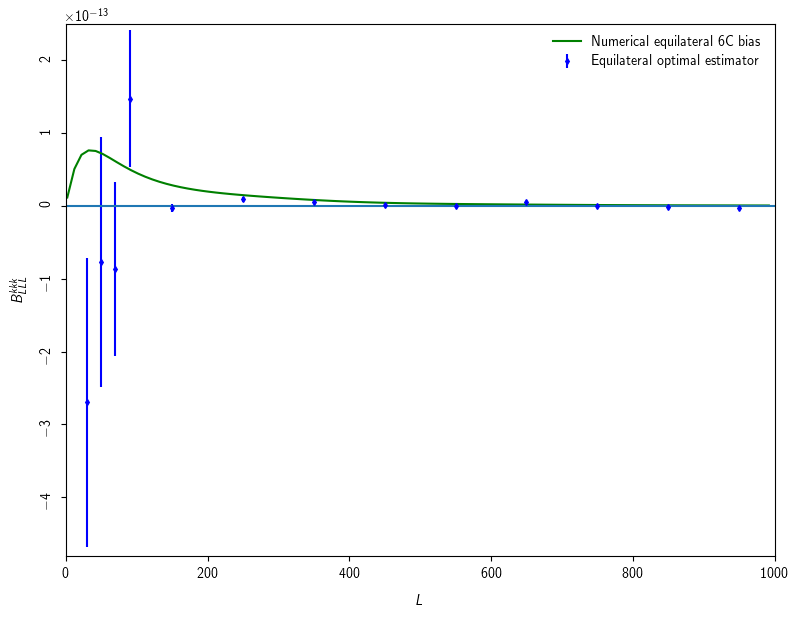

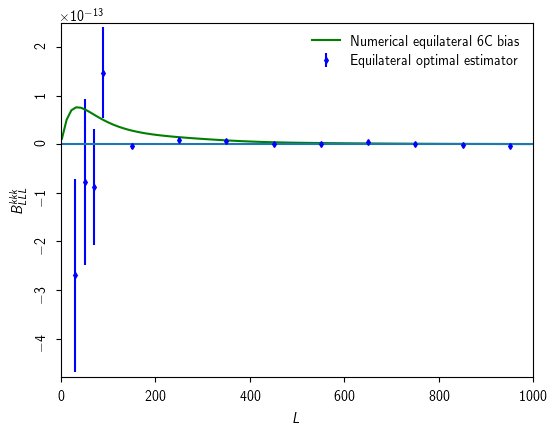

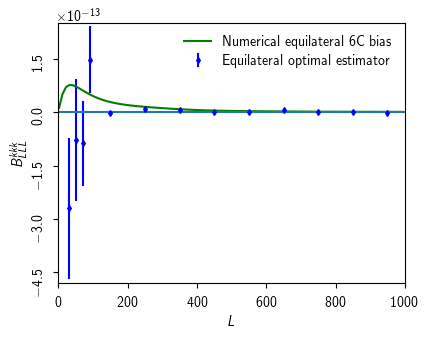

In [4]:
for width in [18., 12., 8.8]:

    fig = plt.figure(figsize=(cm2inch(width), cm2inch(width*6/8.)))
    # this should be changed for making a panel of multiple figures
    ax = fig.add_subplot(111)

    # equi bispectrum
    plt.errorbar(L, average_equi,yerr = err_in_mean, fmt='bd', label="Equilateral optimal estimator", markersize=3)
    #plot shaded region for k6+/-error
    #plt.fill_between(L, k6_minus_err, k6_plus_err, alpha=0.4)
    plt.plot(L__equi_lowL_approx, N2_equi_low_L_kappa, 'green', label = 'Numerical equilateral 6C bias')
    # x axis
    plt.hlines(0, 0, 1000)

    # legend
    leg = plt.legend(frameon=True)
    # remove box around legend
    leg.get_frame().set_edgecolor("white")
    leg.get_frame().set_alpha(.8)

    # labels
    plt.xlabel(r"$L$"); plt.ylabel(r"$B_{LLL}^{kkk}$")
    ax.yaxis.labelpad = 10*width/17.; ax.xaxis.labelpad = 10*width/17. # distance of axis label to tick labels

    # reduce ticks for small figures
    if width < 10:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    # grid
    #plt.grid(True, which="major", axis="both")

    # axes limits
    plt.ylim(-4.8e-13, 2.5e-13)
    plt.xlim([0, 1000])

    # reduce white space around figure
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # set vertical y axis ticklables
    for ticklabel in ax.yaxis.get_ticklabels():
        ticklabel.set_rotation("vertical")

    # save to pdf with right bounding box
    plt.savefig(f"./figures/equi_cmplx_100data_{int(width*10)}.pdf", bbox_inches='tight', pad_inches=0.02)

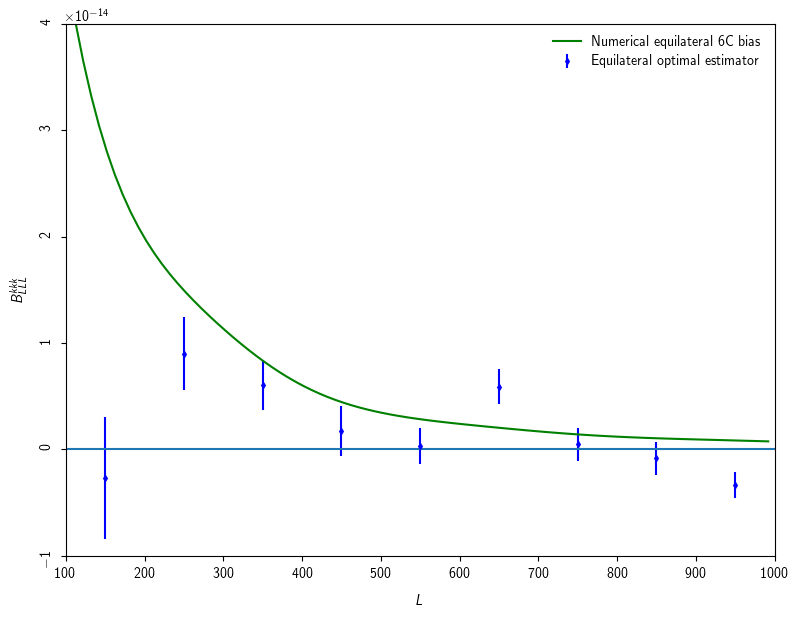

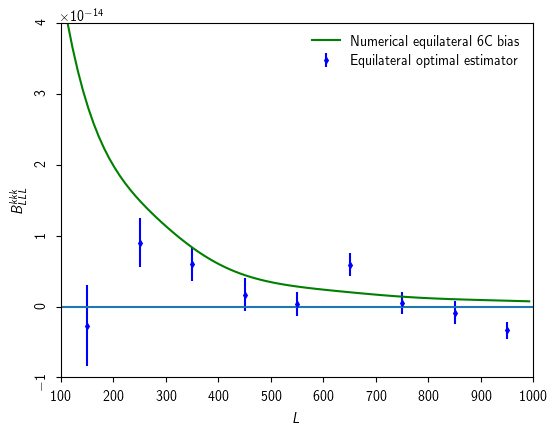

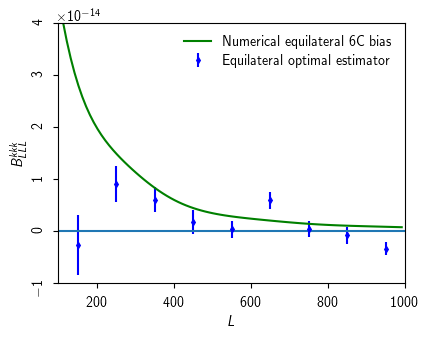

In [5]:
for width in [18., 12., 8.8]:

    fig = plt.figure(figsize=(cm2inch(width), cm2inch(width*6/8.)))
    # this should be changed for making a panel of multiple figures
    ax = fig.add_subplot(111)

    # equi bispectrum
    plt.errorbar(L, average_equi,yerr = err_in_mean, fmt='bd', label="Equilateral optimal estimator", markersize=3)
    #plot shaded region for k6+/-error
    #plt.fill_between(L, k6_minus_err, k6_plus_err, alpha=0.4)
    plt.plot(L__equi_lowL_approx, N2_equi_low_L_kappa, 'green', label = 'Numerical equilateral 6C bias')
    # x axis
    plt.hlines(0, 0, 1000)

    # legend
    leg = plt.legend(frameon=True)
    # remove box around legend
    leg.get_frame().set_edgecolor("white")
    leg.get_frame().set_alpha(.8)

    # labels
    plt.xlabel(r"$L$"); plt.ylabel(r"$B_{LLL}^{kkk}$")
    ax.yaxis.labelpad = 10*width/17.; ax.xaxis.labelpad = 10*width/17. # distance of axis label to tick labels

    #Log?
    # plt.xscale('log')
    # plt.yscale('log')

    # reduce ticks for small figures
    if width < 10:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    # grid
    #plt.grid(True, which="major", axis="both")

    # axes limits
    plt.ylim(-1e-14, 4e-14)
    plt.xlim([100, 1000])

    # reduce white space around figure
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # set vertical y axis ticklables
    for ticklabel in ax.yaxis.get_ticklabels():
        ticklabel.set_rotation("vertical")

    # save to pdf with right bounding box
    plt.savefig(f"./figures/equi_cmplx_100data_zoom_{int(width*10)}.pdf", bbox_inches='tight', pad_inches=0.02)

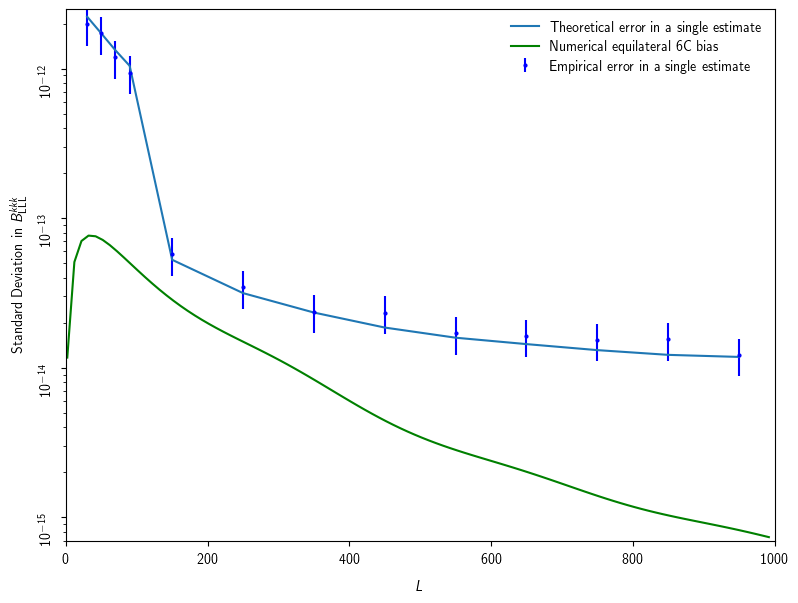

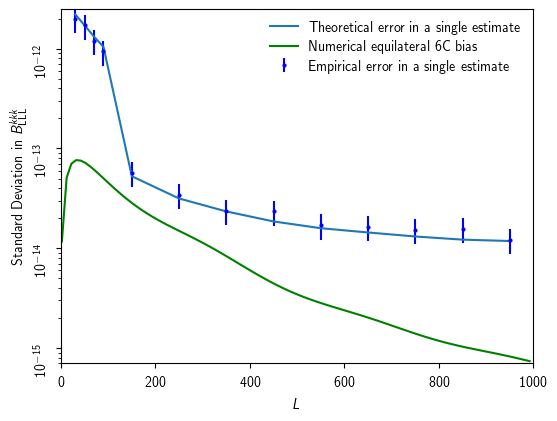

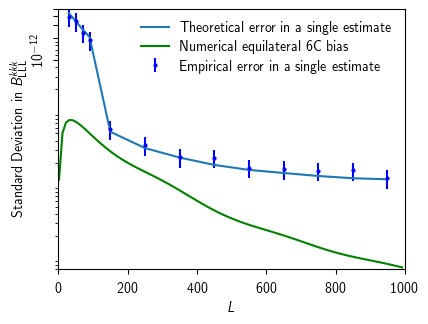

In [7]:
for width in [18., 12., 8.8]:

    fig = plt.figure(figsize=(cm2inch(width), cm2inch(width*6/8.)))
    # this should be changed for making a panel of multiple figures
    ax = fig.add_subplot(111)

    zeros = np.zeros(13)

    # Error on one realisation n.b. monte carlo error in the empirical variance is sqrt(8)sigma/sqrt(N)
    plt.errorbar(L, sigma_cmplx_bsp, yerr = np.sqrt(8)*err_in_mean, fmt = 'bo', markersize = 2, label = 'Empirical error in a single estimate')
    # Theoretical errors
    plt.plot(L, equi_stddev_theory_new, label = 'Theoretical error in a single estimate')
    plt.plot(L__equi_lowL_approx, N2_equi_low_L_kappa, 'green', label = 'Numerical equilateral 6C bias')

    # Log scale?
    plt.yscale('log')
    # x axis
    plt.hlines(0, 0, 1000)

    # legend
    leg = plt.legend(frameon=True)
    # remove box around legend
    leg.get_frame().set_edgecolor("white")
    leg.get_frame().set_alpha(.8)

    # labels
    plt.xlabel(r"$L$"); plt.ylabel(r"Standard Deviation in $B_{\mathrm{LLL}}^{kkk}$")
    ax.yaxis.labelpad = 10*width/17.; ax.xaxis.labelpad = 10*width/17. # distance of axis label to tick labels

    # reduce ticks for small figures
    if width < 10:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))


    # grid
    #plt.grid(True, which="major", axis="both")

    #axes limit
    plt.xlim([0, 1000])
    plt.ylim(7e-16,2.5e-12)

    # reduce white space around figure
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # set vertical y axis ticklables
    for ticklabel in ax.yaxis.get_ticklabels():
        ticklabel.set_rotation("vertical")

    # save to pdf with right bounding box
    plt.savefig(f"./figures/equi_errors_{int(width*10)}.pdf", bbox_inches='tight', pad_inches=0.02)

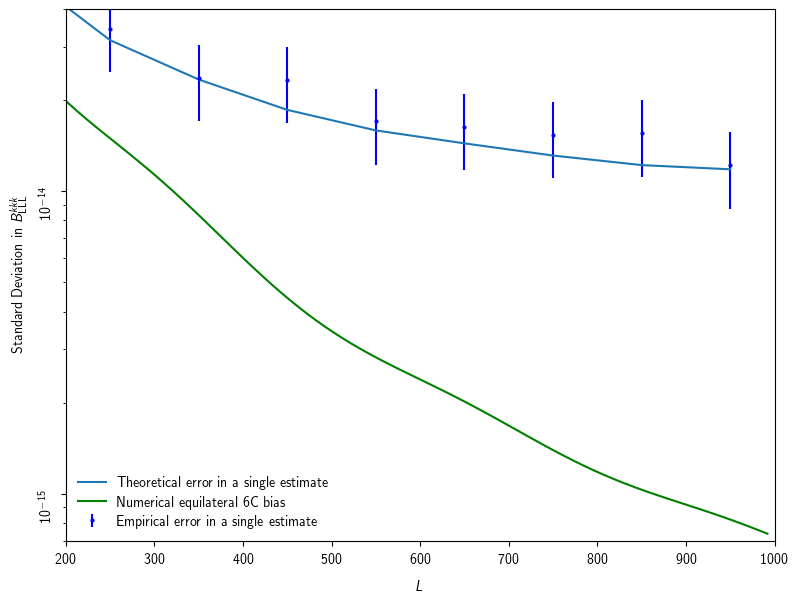

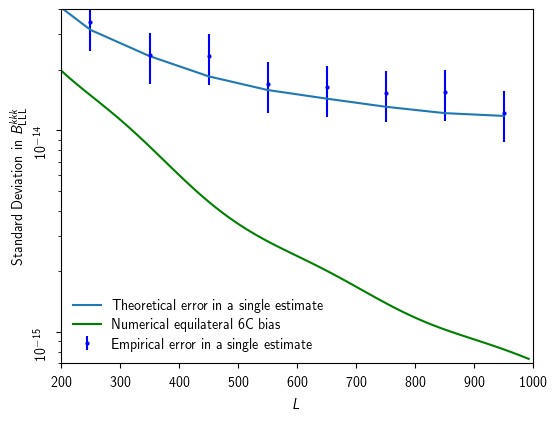

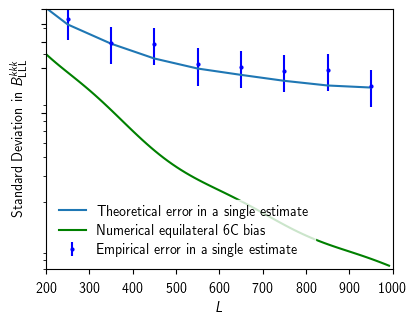

In [9]:
for width in [18., 12., 8.8]:

    fig = plt.figure(figsize=(cm2inch(width), cm2inch(width*6/8.)))
    # this should be changed for making a panel of multiple figures
    ax = fig.add_subplot(111)

    zeros = np.zeros(13)

    # Error on one realisation
    plt.errorbar(L, sigma_cmplx_bsp, yerr = np.sqrt(8)*err_in_mean, fmt = 'bo', markersize = 2, label = 'Empirical error in a single estimate')
    # Theoretical errors
    plt.plot(L, equi_stddev_theory_new, label = 'Theoretical error in a single estimate')
    plt.plot(L__equi_lowL_approx, N2_equi_low_L_kappa, 'green', label = 'Numerical equilateral 6C bias')

    # Log scale?
    plt.yscale('log')
    # x axis
    plt.hlines(0, 0, 1000)

    # legend
    leg = plt.legend(loc = 'lower left', frameon=True)
    # remove box around legend
    leg.get_frame().set_edgecolor("white")
    leg.get_frame().set_alpha(.8)

    # labels
    plt.xlabel(r"$L$"); plt.ylabel(r"Standard Deviation in $B_{\mathrm{LLL}}^{kkk}$")
    ax.yaxis.labelpad = 10*width/17.; ax.xaxis.labelpad = 10*width/17. # distance of axis label to tick labels

    # reduce ticks for small figures
    if width < 10:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    # grid
    #plt.grid(True, which="major", axis="both")

    #axes limit
    plt.xlim([200, 1000])
    plt.ylim(7e-16,4e-14)

    # reduce white space around figure
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # set vertical y axis ticklables
    for ticklabel in ax.yaxis.get_ticklabels():
        ticklabel.set_rotation("vertical")

    # save to pdf with right bounding box
    plt.savefig(f"./figures/equi_errors_zoom_{int(width*10)}.pdf", bbox_inches='tight', pad_inches=0.02)

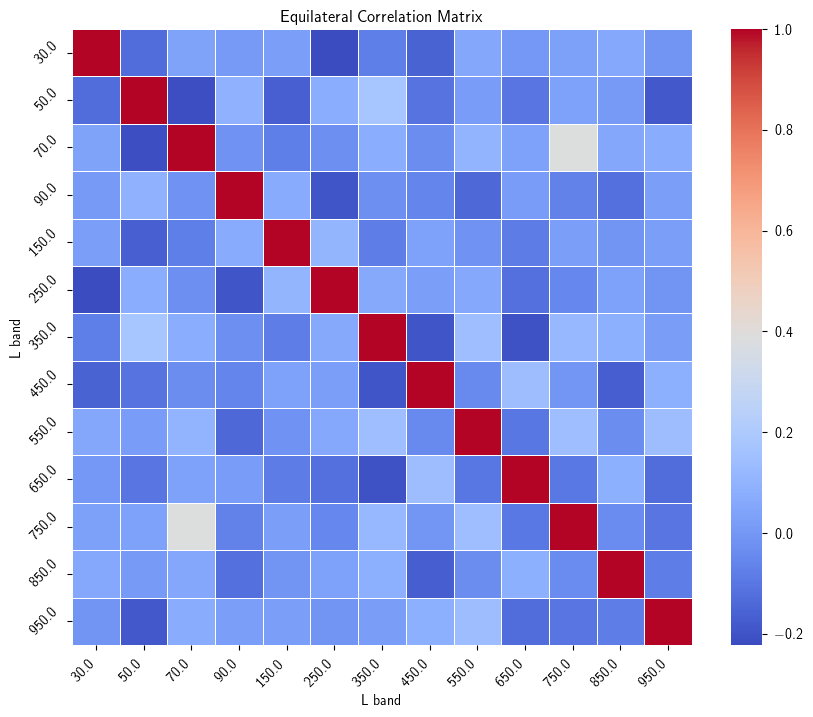

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, cmap='coolwarm', xticklabels=L, yticklabels=L, linewidths=.5)
plt.title('Equilateral Correlation Matrix')
plt.xlabel('L band')
plt.ylabel('L band')
plt.xticks(rotation=45, ha='right')  # Rotate x labels
plt.yticks(rotation=45)  # Rotate y labels
plt.savefig(f"./figures/equilateral_correlation_matrix.pdf", bbox_inches='tight', pad_inches=0.02)

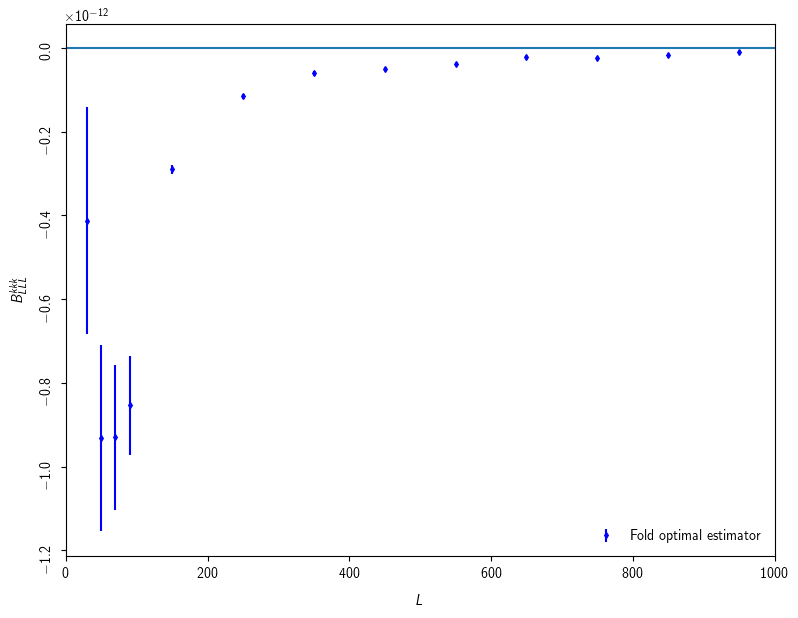

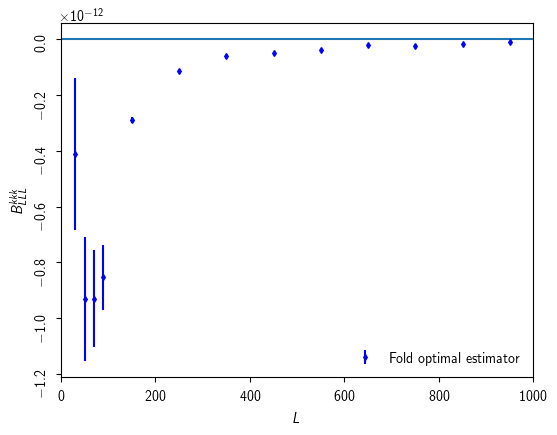

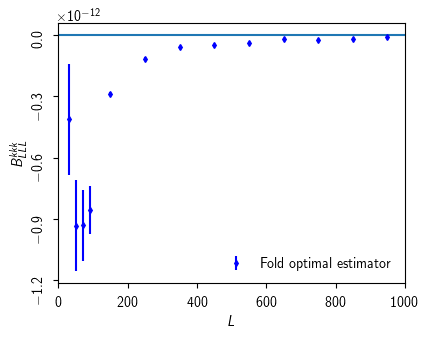

In [ ]:
for width in [18., 12., 8.8]:

    fig = plt.figure(figsize=(cm2inch(width), cm2inch(width*6/8.)))
    # this should be changed for making a panel of multiple figures
    ax = fig.add_subplot(111)

    # equi bispectrum
    plt.errorbar(L, average_fold, yerr = fold_err_in_mean,fmt='bd', label="Fold optimal estimator", markersize=3)
    #plot shaded region for k6+/-error
    # x axis
    plt.hlines(0, 0, 1000)

    # legend
    leg = plt.legend(loc = 'lower right', frameon=True)
    # remove box around legend
    leg.get_frame().set_edgecolor("white")
    leg.get_frame().set_alpha(.8)

    # labels
    plt.xlabel(r"$L$"); plt.ylabel(r"$B_{LLL}^{kkk}$")
    ax.yaxis.labelpad = 10*width/17.; ax.xaxis.labelpad = 10*width/17. # distance of axis label to tick labels

    # reduce ticks for small figures
    if width < 10:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    # grid
    #plt.grid(True, which="major", axis="both")

    # axes limits
    #plt.ylim(-4.8e-13, 2.5e-13)
    plt.xlim([0, 1000])

    # reduce white space around figure
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # set vertical y axis ticklables
    for ticklabel in ax.yaxis.get_ticklabels():
        ticklabel.set_rotation("vertical")

    # save to pdf with right bounding box
    plt.savefig(f"./figures/fold_cmplx_100data_{int(width*10)}.pdf", bbox_inches='tight', pad_inches=0.02)

/home/amb257/jupyter_kernel_plots/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


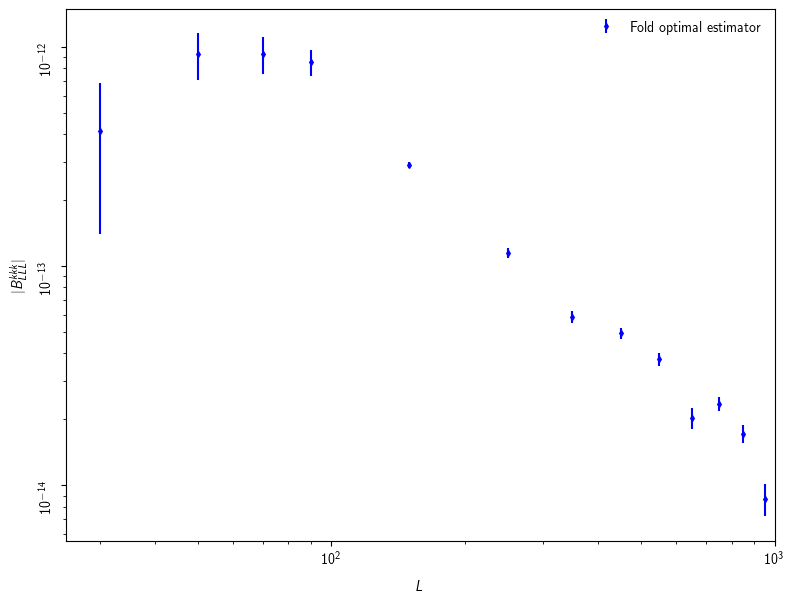

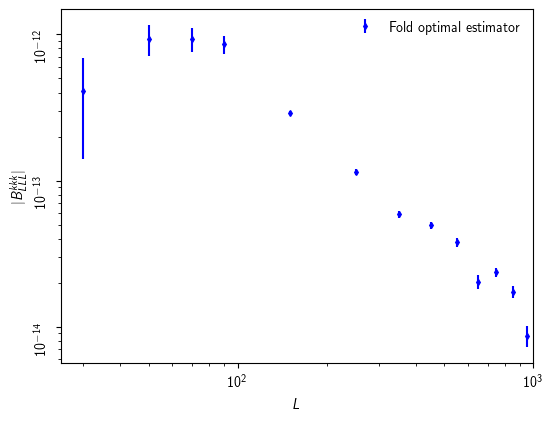

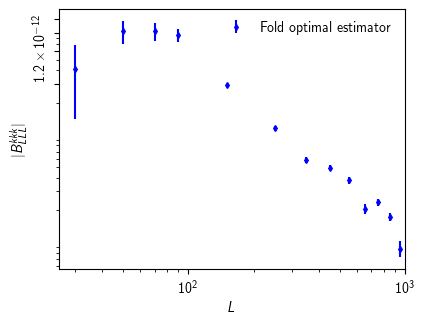

In [ ]:
for width in [18., 12., 8.8]:

    fig = plt.figure(figsize=(cm2inch(width), cm2inch(width*6/8.)))
    # this should be changed for making a panel of multiple figures
    ax = fig.add_subplot(111)

    # equi bispectrum
    plt.errorbar(L, np.abs(average_fold), yerr = fold_err_in_mean,fmt='bd', label="Fold optimal estimator", markersize=3)
    #plot shaded region for k6+/-error
    # x axis
    plt.hlines(0, 0, 1000)

    # legend
    leg = plt.legend(frameon=True)
    # remove box around legend
    leg.get_frame().set_edgecolor("white")
    leg.get_frame().set_alpha(.8)

    #Log?
    plt.xscale('log')
    plt.yscale('log')

    # labels
    plt.xlabel(r"$L$"); plt.ylabel(r"$|B_{LLL}^{kkk}|$")
    ax.yaxis.labelpad = 10*width/17.; ax.xaxis.labelpad = 10*width/17. # distance of axis label to tick labels

    # reduce ticks for small figures
    if width < 10:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    # grid
    #plt.grid(True, which="major", axis="both")

    # axes limits
    #plt.ylim(0,0.5e-12)
    plt.xlim([0, 1000])

    # reduce white space around figure
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # set vertical y axis ticklables
    for ticklabel in ax.yaxis.get_ticklabels():
        ticklabel.set_rotation("vertical")

    # save to pdf with right bounding box
    plt.savefig(f"./figures/fold_cmplx_100data_zoom_{int(width*10)}.pdf", bbox_inches='tight', pad_inches=0.02)

[4.18092898e-12 3.21320180e-12 2.48869403e-12 1.98253289e-12
 1.76666995e-13 9.27034506e-14 6.07600023e-14 4.48370715e-14
 3.56515693e-14 3.00795061e-14 2.58672547e-14 2.26339756e-14
 2.04045727e-14]
[4.18092898e-12 3.21320180e-12 2.48869403e-12 1.98253289e-12
 1.76666995e-13 9.27034506e-14 6.07600023e-14 4.48370715e-14
 3.56515693e-14 3.00795061e-14 2.58672547e-14 2.26339756e-14
 2.04045727e-14]
[4.18092898e-12 3.21320180e-12 2.48869403e-12 1.98253289e-12
 1.76666995e-13 9.27034506e-14 6.07600023e-14 4.48370715e-14
 3.56515693e-14 3.00795061e-14 2.58672547e-14 2.26339756e-14
 2.04045727e-14]


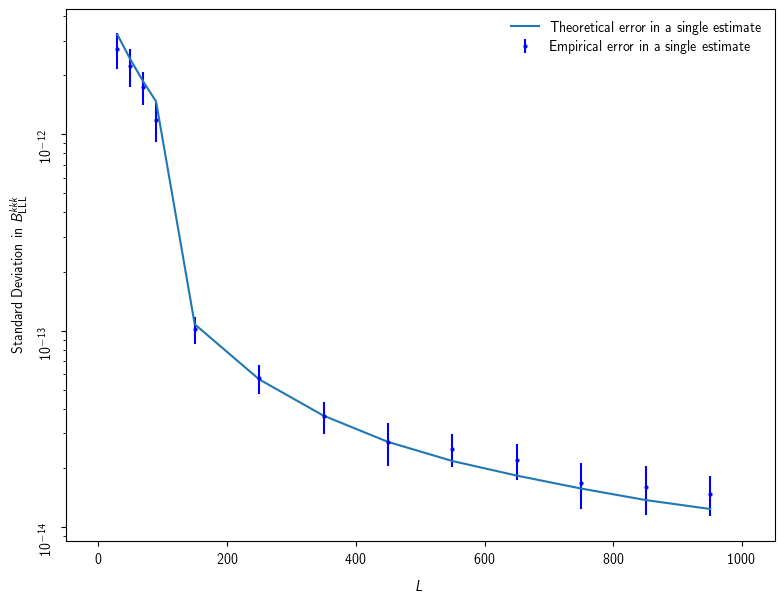

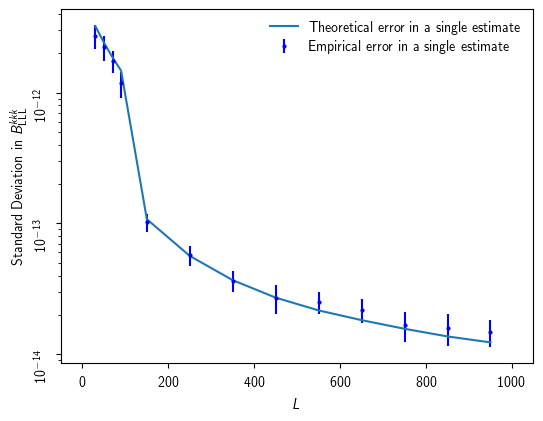

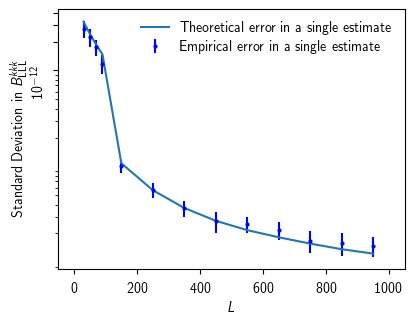

In [ ]:
for width in [18., 12., 8.8]:

    ac_variance = np.array((3.21e-12, 2.40e-12, 1.85e-12, 1.47e-12, 1.07e-13, 5.61e-14, 3.66e-14, 2.69e-14, 2.15e-14, 1.81e-14, 1.55e-14, 1.36e-14, 1.22e-14))
    fig = plt.figure(figsize=(cm2inch(width), cm2inch(width*6/8.)))
    # this should be changed for making a panel of multiple figures
    ax = fig.add_subplot(111)

    zeros = np.zeros(13)

    # Error on one realisation n.b. monte carlo error in the empirical variance is sqrt(8)sigma/sqrt(N)
    plt.errorbar(L, fold_sigma_cmplx_bsp, yerr = np.sqrt(8)*err_in_mean, fmt = 'bo', markersize = 2, label = 'Empirical error in a single estimate')
    # Theoretical errors
    plt.plot(L, fold_stddev_theory_new, label = 'Theoretical error in a single estimate')
    # plt.plot(L, ac_variance, ls = '--', label = 'AC theory error')

    # Log scale?
    plt.yscale('log')
    # x axis
    plt.hlines(0, 0, 1000)

    # legend
    leg = plt.legend(frameon=True)
    # remove box around legend
    leg.get_frame().set_edgecolor("white")
    leg.get_frame().set_alpha(.8)

    # labels
    plt.xlabel(r"$L$"); plt.ylabel(r"Standard Deviation in $B_{\mathrm{LLL}}^{kkk}$")
    ax.yaxis.labelpad = 10*width/17.; ax.xaxis.labelpad = 10*width/17. # distance of axis label to tick labels

    # reduce ticks for small figures
    if width < 10:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    # grid
    #plt.grid(True, which="major", axis="both")



    # reduce white space around figure
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # set vertical y axis ticklables
    for ticklabel in ax.yaxis.get_ticklabels():
        ticklabel.set_rotation("vertical")

    # save to pdf with right bounding box
    plt.savefig(f"./figures/equi_errors_{int(width*10)}.pdf", bbox_inches='tight', pad_inches=0.02)
    print(fold_stddev_theory)

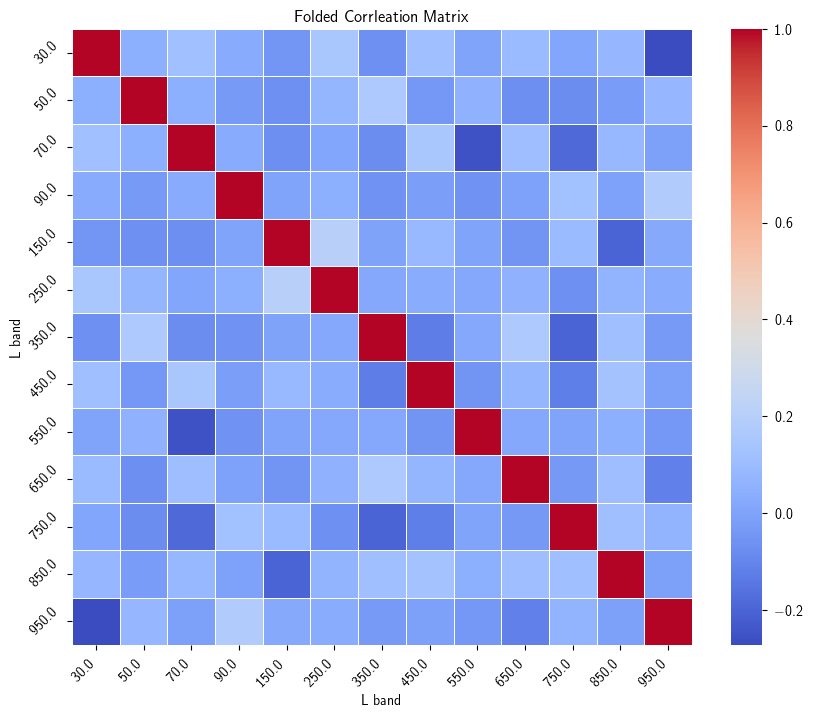

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(fold_correlation_matrix, cmap='coolwarm', xticklabels=L, yticklabels=L, linewidths=.5)
plt.title('Folded Corrleation Matrix')
plt.xlabel('L band')
plt.ylabel('L band')
plt.xticks(rotation=45, ha='right')  # Rotate x labels
plt.yticks(rotation=45)  # Rotate y labels
plt.savefig(f"./figures/folded_correlation_matrix.pdf", bbox_inches='tight', pad_inches=0.02)

[6.40302902e-15 6.64222971e-15 7.11717203e-15 7.85882983e-15
 8.86412048e-15 1.01228806e-14 1.15931719e-14 1.31879462e-14
 1.47740424e-14 1.61809823e-14 1.72718618e-14 1.79608547e-14
 1.83147687e-14 1.84476079e-14 1.85497666e-14 1.87485858e-14
 1.91244091e-14 1.97211808e-14 2.05048924e-14 2.13673187e-14
 2.22231406e-14 2.29049403e-14 2.33912981e-14 2.36506155e-14
 2.37271824e-14 2.37566109e-14 2.38562491e-14 2.40903557e-14
 2.45574963e-14 2.51831984e-14 2.59841384e-14 2.68032302e-14
 2.75689275e-14 2.81901779e-14 2.86482867e-14 2.89488511e-14
 2.92305119e-14 2.95223179e-14 2.99396409e-14 3.04998379e-14
 3.11991242e-14 3.19442590e-14 3.26432535e-14 3.31569049e-14
 3.34616891e-14 3.36026559e-14 3.36482714e-14 3.37393456e-14
 3.39954366e-14 3.45049712e-14 3.53100960e-14 3.63527925e-14
 3.75438495e-14 3.87303563e-14 3.98328644e-14 4.07836032e-14
 4.15808155e-14 4.24057354e-14 4.32648564e-14 4.44070865e-14
 4.58166279e-14 4.74148025e-14 4.91573228e-14 5.08894097e-14
 5.24406795e-14 5.371561

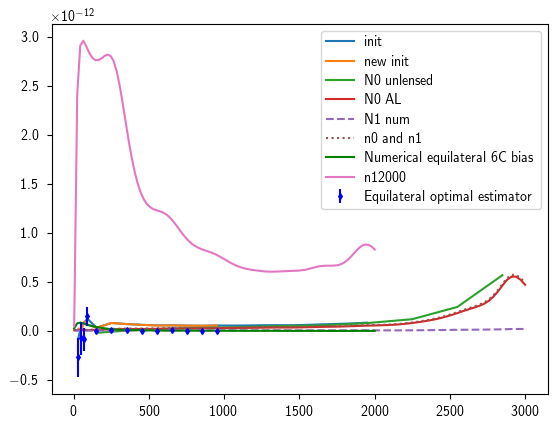

In [ ]:
# Make plot comparing naive reconstruction to RD estimator and N0, N1
L_N0_pair, N0_pair,_ = np.loadtxt('./Paired_sim_data/N0_kappa_noise.txt')
L_N1_pair, N1_pair,_ = np.loadtxt('./Paired_sim_data/NONOISE_EQUI_N1_bs_kappa.txt')
L_N0, N0 = np.loadtxt('/home/amb257/kappa_bispec/bias_from_sims/bispec/N0tests/unlensed_sim_N0_kappa.txt')
L_N0_alba, n0_equil = np.loadtxt('/home/amb257/kappa_bispec/alba_2023/CMBlens_bispectrum_noisebiases/output/N0equil_rlmax3000Lmax3000_lCl_lCl_lCl.txt', unpack = True)
L_N1_alba, N1_alba_eq = np.loadtxt('/home/amb257/kappa_bispec/alba_2023/CMBlens_bispectrum_noisebiases/output/coupN1equil_rlmax3000Lmax3000_lCl_lCl_lCl.txt', unpack = True)
L_N1_2000, N1_2000 = np.loadtxt('/home/amb257/kappa_bispec/alba_2023/CMBlens_bispectrum_noisebiases/output/sepN1equil_rlmax2000Lmax2000_gCl_lCl_lCl.txt', unpack = True)
# convert to kappa
Lmin, Lmax = 2, 3000
rlmin, rlmax = 2,3000
rsample = 100 # or fully sampled: int(rlmax-rlmin+1)
L_al = np.linspace(Lmin,Lmax+1,rsample) 

kfactor = L_al**2/2
#L_N0_num, N0_num = np.loadtxt('/home/amb257/kappa_bispec/bispec_opt_est/N0_numerical/N0_numerical_equi.txt', unpack=True)

L_init, init, err_init = np.loadtxt('/home/amb257/rds/hpc-work/kappa_bispec/optimal_est/onesimterms/results/init_av.txt')
L_N0_own_numerical, N0_own_numerical = np.loadtxt('/home/amb257/kappa_bispec/bispec_opt_est/N0_numerical/N0_numerical_equi.txt', unpack='True')
directL, directbsp, err_direct = np.loadtxt('/home/amb257/rds/hpc-work/kappa_bispec/optimal_est/onesimterms/results/direct_bsp_448_sims.txt')
std_recon = {}
for i in range(500):
    L, std_recon[i] = np.loadtxt(f'/home/amb257/rds/hpc-work/kappa_bispec/optimal_est/onesimterms/initialterm_{i}.txt')
    #plt.plot(L, std_recon[i], alpha = 0.03)
all_std_recon = np.array([std_recon[i] for i in std_recon.keys()])
average_std_recon = np.mean(all_std_recon, axis=0)
#plt.plot(L_N0_pair, N0_pair, label = 'paired N0')
#plt.plot(L_N1_pair, N1_pair, label = 'paired N1')
plt.plot(L_init, init, label = 'init')
plt.plot(L, average_std_recon, label = 'new init')
plt.plot(L_N0, N0, label = 'N0 unlensed')
plt.plot(L_N0_alba, kfactor**3*n0_equil, label ='N0 AL')
plt.plot(L_N1_alba, kfactor**3*N1_alba_eq, ls = '--',label = 'N1 num')
plt.plot(L_N0_alba, kfactor**3*n0_equil + kfactor**3*N1_alba_eq, ls = ':', label = 'n0 and n1')
plt.plot(L_analytic, N2_6pt, 'green', label = 'Numerical equilateral 6C bias')
plt.plot(L_N1_2000, kfactor**3*N1_2000, label = 'n12000')
#plt.plot(L_N0_own_numerical, N0_own_numerical, label = 'own N0')
#plt.plot(directL, directbsp, label = 'direct optimal estimator')
plt.errorbar(L, average_equi,yerr = err_in_mean, fmt='bd', label="Equilateral optimal estimator", markersize=3)
plt.legend()
#plt.xlim(0, 500)
#plt.ylim(-1e-13, 1e-13)
print(kfactor**3*n0_equil)
print(N0)
# some notes - the initial term seems way too small (ie not N0 +N1 etc) but works when combine to make direct estimator so suspect ok - does this mean 
# that the initial term shouldn't include N0 and N1? as in something to do with the sims or recon means don't have all of these terms?

(10, 2000)

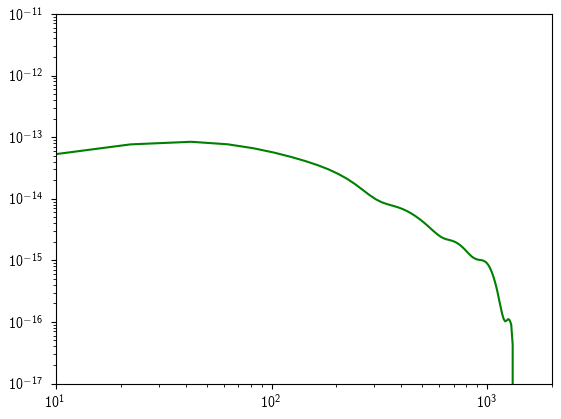

In [ ]:
plt.loglog(L_analytic, N2_6pt, 'green', label = 'Numerical equilateral 6C bias')
plt.ylim(1e-17, 1e-11)
plt.xlim(10,2000)

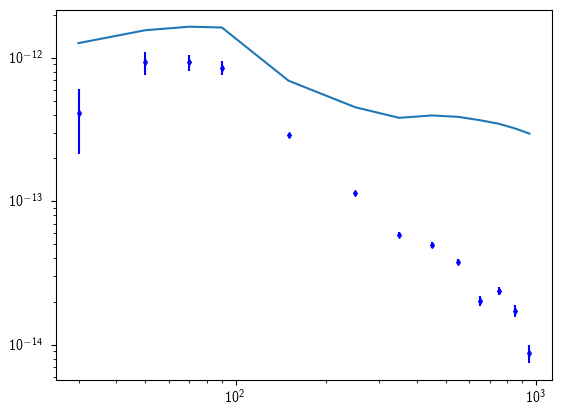

In [ ]:
# Make plot comparing naive reconstruction to RD estimator and N0, N1

std_recon_fld = {}
for i in range(500):
    L, std_recon_fld[i] = np.loadtxt(f'/home/amb257/rds/hpc-work/kappa_bispec/optimal_est/onesimterms/fold_initialterm_{i}.txt')
    #plt.plot(L, std_recon[i], alpha = 0.03)
all_std_recon_fld = np.array([std_recon_fld[i] for i in std_recon.keys()])
average_std_recon_fld = np.mean(all_std_recon_fld, axis=0)
plt.plot(L, np.abs(average_std_recon_fld))
plt.errorbar(L, np.abs(average_fold),yerr = err_in_mean, fmt='bd', label="Equilateral optimal estimator", markersize=3)
plt.yscale('log')
plt.xscale('log')




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.         1.10771231 1.91986534 2.67996093 3.38216481 4.01038231
 4.5618117  5.0483178  5.48120982 5.86579001 6.20499151 6.50299253
 6.7644926  6.99358579 7.19424614 7.37060583 7.52676497 7.66601361
 7.7907945  7.90291132 8.00374206 8.09433864 8.17555647 8.2482351
 8.31328006 8.37161691 8.4241344  8.47166318 8.51488399 8.55434511
 8.59047441 8.62360481 8.6540028  8.68189578 8.70748635 8.73095751
 8.75247789 8.77220564 8.79029361 8.80687393 8.82206467 8.83597686]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


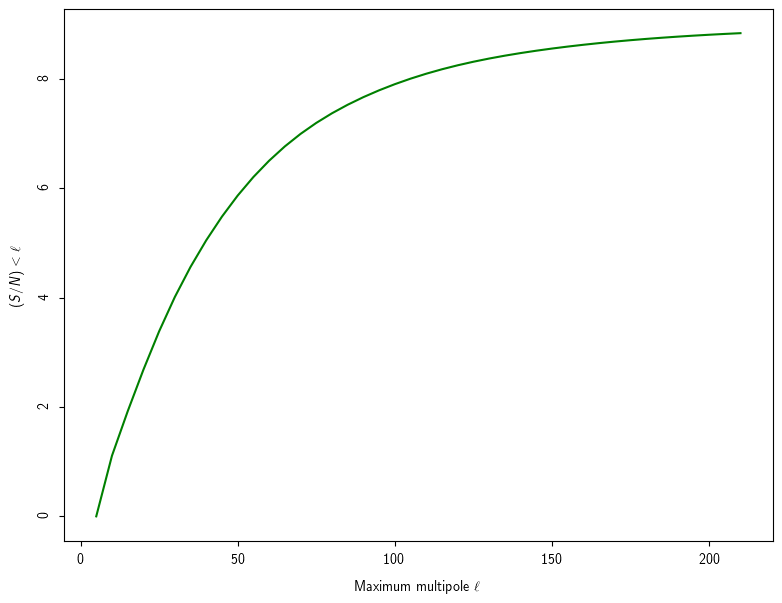

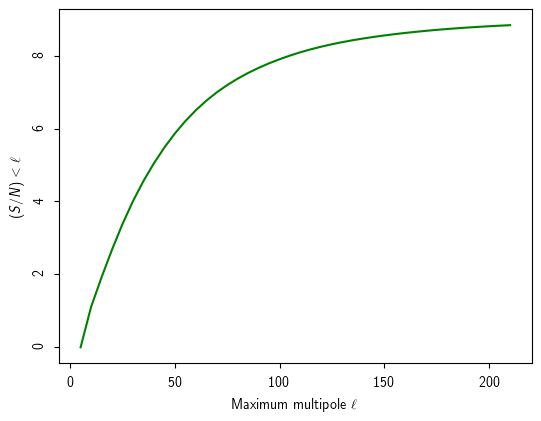

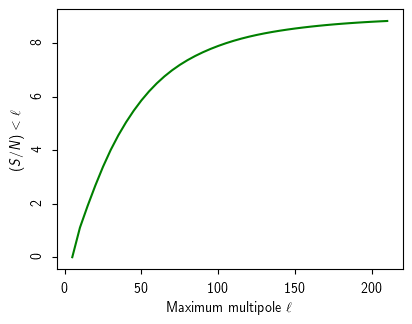

In [14]:
# SNR plots generated using cmblensplus using snr_iterative.py under ../../snr_calculations 

L_snr, snr = np.loadtxt('snr.txt', unpack='True')
print(snr)

for width in [18., 12., 8.8]:

    fig = plt.figure(figsize=(cm2inch(width), cm2inch(width*6/8.)))
    # this should be changed for making a panel of multiple figures
    ax = fig.add_subplot(111)

    plt.plot(L_snr, snr, 'green')

    # legend
    leg = plt.legend(frameon=True)
    # remove box around legend
    leg.get_frame().set_edgecolor("white")
    leg.get_frame().set_alpha(.8)

    # labels
    plt.xlabel( r"Maximum multipole $\ell$"); plt.ylabel(r"$(S/N) < \ell$")
    ax.yaxis.labelpad = 10*width/17.; ax.xaxis.labelpad = 10*width/17. # distance of axis label to tick labels

    #Log?
    # plt.xscale('log')
    # plt.yscale('log')

    # reduce ticks for small figures
    if width < 10:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

    # grid
    #plt.grid(True, which="major", axis="both")

    # axes limits

    # reduce white space around figure
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # set vertical y axis ticklables
    for ticklabel in ax.yaxis.get_ticklabels():
        ticklabel.set_rotation("vertical")

    # save to pdf with right bounding box
    plt.savefig(f"./figures/fold_snr_{int(width*10)}.pdf", bbox_inches='tight', pad_inches=0.02)